# KnapsackV2
1BM120

    Import the neccary packages
- `Numpy` for our Qtable
- `OpenAI Gym` for our FrozenLake Environment
- `Random` to generate random numbers
- `Deque` to record cumulative reward over multiple episodes
- `MatPlotlib` to generate plots

In [76]:
import numpy as np
import gym
import or_gym
import random
from collections import deque
import matplotlib.pyplot as plt
import pandas as pd
#from mlxtend.plotting import scatterplotmatrix
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Part 1: Explore Knapsack

 **Task 1:** 
- Create an instance of the environment
- Print and plot the state and action space

In [2]:
env = or_gym.make("Knapsack-v2") # Create an  instance of the environment 
env.mask = False

In [3]:
state_space = env.reset()#env.observation_space.n#Get number of states in an environment 
action_space = env.action_space.n#env.action_space.n#Get number of actions in an environment 
print('Action space', action_space)
print('State space', state_space)
#0: list of item weights
#1: list of item values
#2: list of item limits

Action space 200
State space [[  5  62  68   9  14  21  99  76  50  75   1  27  79  80  81  84  51  41
   35  34  28  56  31  97  80  11  67  75  34  39  59  76  26  69  69  63
   49  51  79  98   2  66  62  13   7  11  27  92  67   5  32  89  31  18
   18  85  56  57  40  82  15  18  48  59  73   7  74  43  26  30  72   6
   95  92  74  54  10  71   5  48  83  46   3   4  12  29  78   2  48  37
   77  14  30  40  16  79  25  74  64  63  85  26  41  31  79  88  31  26
   68  18  31  62  55  60  16   5  99  34  60   8  42  33  10  80  29  93
    4  26  71   6  65   9  18  79  83  69  64  90  63  55   3  76  27  57
   15  72  22  85  18  78  39  36  90  46  38  60  61  37   8  57  56  54
   73  51  98  35  15  54  26   6  60  14  66  31  40  24  11  66  56  70
   22  71  50  95  22  72  82  57  99  70  86  19  28  95  20  85  57  65
   60  51 200]
 [ 73  90  22  49  74  20  89  27   2  81   0  80  10  14  50  83  81  76
   20  52  81   6  55  49  68  74  54  79  69  21  58  39  82  67   

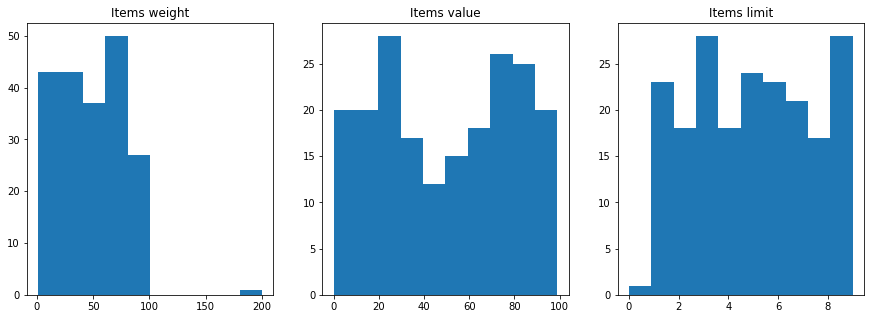

In [4]:
# Plot of the state space

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 5))

ax1.hist(state_space[0])
ax1.set_title("Items weight")

ax2.hist(state_space[1])
ax2.set_title("Items value")

ax3.hist(state_space[2])
ax3.set_title("Items limit")

plt.show()

In [5]:
X = np.array([state_space[0], state_space[1], state_space[2]]).T
scatterplotmatrix(X, figsize=(15, 7), names = ["Items weights", "Items value", "Items limit"])
plt.tight_layout()
plt.show()

NameError: name 'scatterplotmatrix' is not defined

**Task 2:**
- Sample an action from the environment.
- Call the step function and inspect the outputs.

In [6]:
state = env.reset()
action = env.action_space.sample()# sample an action from the env instance
print(action)

184


In [7]:
env.step(action)# call the step function of the env. and inspect quadruple of (state, reward, done, info)


(array([[  5,  62,  68,   9,  14,  21,  99,  76,  50,  75,   1,  27,  79,
          80,  81,  84,  51,  41,  35,  34,  28,  56,  31,  97,  80,  11,
          67,  75,  34,  39,  59,  76,  26,  69,  69,  63,  49,  51,  79,
          98,   2,  66,  62,  13,   7,  11,  27,  92,  67,   5,  32,  89,
          31,  18,  18,  85,  56,  57,  40,  82,  15,  18,  48,  59,  73,
           7,  74,  43,  26,  30,  72,   6,  95,  92,  74,  54,  10,  71,
           5,  48,  83,  46,   3,   4,  12,  29,  78,   2,  48,  37,  77,
          14,  30,  40,  16,  79,  25,  74,  64,  63,  85,  26,  41,  31,
          79,  88,  31,  26,  68,  18,  31,  62,  55,  60,  16,   5,  99,
          34,  60,   8,  42,  33,  10,  80,  29,  93,   4,  26,  71,   6,
          65,   9,  18,  79,  83,  69,  64,  90,  63,  55,   3,  76,  27,
          57,  15,  72,  22,  85,  18,  78,  39,  36,  90,  46,  38,  60,
          61,  37,   8,  57,  56,  54,  73,  51,  98,  35,  15,  54,  26,
           6,  60,  14,  66,  31,  40,

**Task 3:**
- Randomly interact with the envrionment for two episodes.  

In [115]:
for episode in range(2):
    state = env.reset()# get the starting state from the env.
    total_reward = 0; weight = 0; nr_items = 0
    done = False
    print("\nEPISODE ", episode)
    print("__________")
    for step in range(99): 
        action = env.action_space.sample() # is the index of the items list
        new_state, reward, done, info = env.step(action) #give the action to environment to obtain reward, and next state, 
        print(new_state)
        print("Item {} with a reward of {}".format(action, reward))
        if done: # if the goal state is reached or bag is full. 
            print("\nItem {} exceeded the limit which has a weight of {}".format(action, new_state[0][action])) # Chosen a item that exceeds the capacity
            print("Total weight sack =\t", weight)
            print("Number of items =\t", nr_items)
            print("Total reward =\t", total_reward)         
            
            break
        nr_items += 1
        total_reward += reward
        state = new_state
        weight = state[0][action]
env.close()


EPISODE  0
__________
[[  5  62  68   9  14  21  99  76  50  75   1  27  79  80  81  84  51  41
   35  34  28  56  31  97  80  11  67  75  34  39  59  76  26  69  69  63
   49  51  79  98   2  66  62  13   7  11  27  92  67   5  32  89  31  18
   18  85  56  57  40  82  15  18  48  59  73   7  74  43  26  30  72   6
   95  92  74  54  10  71   5  48  83  46   3   4  12  29  78   2  48  37
   77  14  30  40  16  79  25  74  64  63  85  26  41  31  79  88  31  26
   68  18  31  62  55  60  16   5  99  34  60   8  42  33  10  80  29  93
    4  26  71   6  65   9  18  79  83  69  64  90  63  55   3  76  27  57
   15  72  22  85  18  78  39  36  90  46  38  60  61  37   8  57  56  54
   73  51  98  35  15  54  26   6  60  14  66  31  40  24  11  66  56  70
   22  71  50  95  22  72  82  57  99  70  86  19  28  95  20  85  57  65
   60  51 200]
 [ 73  90  22  49  74  20  89  27   2  81   0  80  10  14  50  83  81  76
   20  52  81   6  55  49  68  74  54  79  69  21  58  39  82  67   5  41


### Neural network

In [9]:
x_weight = state_space[0]
x_value = state_space[1]
x_limit = state_space[2]
print(x_weight, x_value, x_limit)

[  5  62  68   9  14  21  99  76  50  75   1  27  79  80  81  84  51  41
  35  34  28  56  31  97  80  11  67  75  34  39  59  76  26  69  69  63
  49  51  79  98   2  66  62  13   7  11  27  92  67   5  32  89  31  18
  18  85  56  57  40  82  15  18  48  59  73   7  74  43  26  30  72   6
  95  92  74  54  10  71   5  48  83  46   3   4  12  29  78   2  48  37
  77  14  30  40  16  79  25  74  64  63  85  26  41  31  79  88  31  26
  68  18  31  62  55  60  16   5  99  34  60   8  42  33  10  80  29  93
   4  26  71   6  65   9  18  79  83  69  64  90  63  55   3  76  27  57
  15  72  22  85  18  78  39  36  90  46  38  60  61  37   8  57  56  54
  73  51  98  35  15  54  26   6  60  14  66  31  40  24  11  66  56  70
  22  71  50  95  22  72  82  57  99  70  86  19  28  95  20  85  57  65
  60  51 200] [73 90 22 49 74 20 89 27  2 81  0 80 10 14 50 83 81 76 20 52 81  6 55 49
 68 74 54 79 69 21 58 39 82 67  5 41 17 68 12  3 70 27 97 28 38 68 23 26
 36 77 11 35 65 49 27 70 82 30 31 12 

In [132]:
def get_model(item_count=action_space):
    input_weights = tf.keras.Input((item_count+1),3)
    #input_prices = tf.keras.Input((item_count,))
    #input_limits = tf.keras.Input((item_count,))
    
    #inputs_concat = tf.keras.layers.Concatenate()([input_weights, input_prices, input_limits])
    
    picks = tf.keras.layers.Dense((item_count+1) ** 2 + (item_count+1) * 2, activation="sigmoid")(input_weights)
    picks = tf.keras.layers.Dense(item_count+1, activation="sigmoid")(picks)
    model = tf.keras.Model(inputs=input_weights, outputs=picks)
    return model

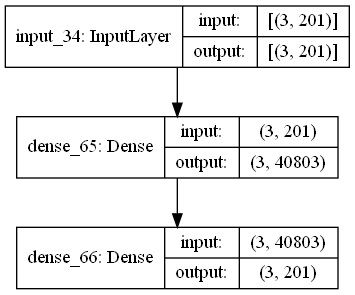

In [133]:
model = get_model()
model_target = get_model()
keras.utils.plot_model(model, show_shapes=True)

In [127]:
model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [142]:
ACTION_SPACE = action_space
EPISODES = 1
STEPS = 10
GAMMA=0.99
RENDER=False

#optimizer = keras.optimizers.Adam(learning_rate=0.00025, clipnorm=1.0)

all_rewards =[]
best_rolling = -99999
for episode in range(EPISODES):
    done=False
    state = env.reset()
    lp1=[]
    lp2=[]
    lp3=[]
    a=[]
    r=[]
    d=[]
    s=[]

    for step in range(STEPS):
        if RENDER:
            env.render()
        #print(model(state))
        log_prob_weight, log_prob_value, log_prob_limit = model(state)
        
        #log_prob = log_prob_weight *log_prob_value * log_prob_limit
        #print(log_prob)
        
        action = env.action_space.sample()
        
        state,reward,done,i_ = env.step(action)
        #print(state,r_,done,i_)
        
        lp1.append(log_prob_weight)
        lp2.append(log_prob_value)
        lp3.append(log_prob_limit)
        
        r.append(reward)
        print(step, action, reward)
        if done:
            all_rewards.append(np.sum(r))
            
            #if episode%100 ==0:
            #   print(f"EPISODE {episode} SCORE: {np.sum(r)} roll{pd.Series(all_rewards).tail(100).mean()}")
            #    # RENDER = True
            #   torch.save(model.state_dict(), 'outputs/last_params_cloud.ckpt')
            #   if pd.Series(all_rewards).tail(100).mean()>best_rolling:
            #       best_rolling = pd.Series(all_rewards).tail(100).mean()
            #       print("saving...")
            #       torch.save(model.state_dict(), 'outputs/best_params_cloud.ckpt')
            #break
 
    print(r)
    discounted_rewards = []

    for t in range(len(r)):
        Gt = 0 
        pw = 0
        for r_ in r[t:]:
            Gt = Gt + GAMMA**pw * r_
            pw = pw + 1
        discounted_rewards.append(Gt)
    
    discounted_rewards = np.array(discounted_rewards)
    #print(discounted_rewards)
    
    #discounted_rewards = torch.tensor(discounted_rewards,dtype=torch.float32,device=DEVICE)
    discounted_rewards = (discounted_rewards - np.mean(discounted_rewards))/ (np.std(discounted_rewards))
    #print(discounted_rewards)
    
    log_prob = tf.stack(lp)
    policy_gradient = -log_prob*discounted_rewards

    model.zero_grad()
    policy_gradient.sum().backward()
    optimizer.step()

0 106 43
1 57 30
2 87 71
3 66 4
4 148 91
5 85 0
6 137 0
7 6 0
8 184 0
9 133 0
[43, 30, 71, 4, 91, 0, 0, 0, 0, 0]


InvalidArgumentError: Incompatible shapes: [1,201] vs. [10] [Op:Mul]

## Part 2: Q-Table 🗄️
We will implement Q-learning algorithm to devise optimal policy for FrozenLake environment. 

**Task 4**
- Create Q-table with `state space` as rows and `action space` as columns.
state =16  action=4

In [ ]:
qtable = np.zeros((len(state_space), action_space))
print(qtable)

## Part 3: The Q learning algorithm 🧠
It is fine if you do not understand all the details at this point. Q-learning will be introduced in Lecture 3 of DRL part. 



Q learning is a off-policy algorithm. Meaning that the actions that are executed are different from the target actions that are used for learning. 
Epsilon-greedy policy – most likely selects the `greedy actions` but can select `random actions` too 
- Ensures explorations
- Choose greedy action with 1- є (epsilon) 
- Choose random action with є (epsilon)

In [ ]:
def epsilon_greedy_policy(Q, state, epsilon): 
      # Q:          : state-action pair
      # State (int) : current state
      # eps (float): epsilon
    action = 0
    if random.uniform(0, 1) > epsilon: #exploitation
        action = np.argmax(Q[state,:])
    else: #exploration 
        action = env.action_space.sample()
    return action


The algorithm takes nine arguments:
- `env`: This is an instance of an OpenAI Gym environment.
- `total_episodes`: This is the number of episodes that are generated through agent-environment interaction.
- `max_step`: This is the max number of interactions between agent and env. within a single episode.  
- `epsilon`: This is to encourage exploration. Epsilon is decayed over time to discourage explortation and encourage exploitation once agent has explored different state. 
- `max_epsilon`: This is the maximum value of epsilon. 
- `min_epsilon`: This is the minimum value of epsilon. 
- `decay_rate`: This is the decay rate for epsilon. 
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).
- `plot_every`: This is additional argument to plot the cumulative reward against episodes. 

The algorithm returns as output:
- `qtable`: This is an ndarray where `qtable[s][a]` is the estimated action value corresponding to state `s` and action `a`.

**Task 5**
- Fill the missing code to complete the Q-learning implementation.
- Write a condition to break the loop as soon as agent receives a reward of 0.78 or higher in 100 consecutive episodes.

In [ ]:
def q_learning(env, total_episodes, max_steps = 99, epsilon = 1.0, max_epsilon = 1.0, min_epsilon = 0.01, decay_rate = 0.005,  gamma=0.95, plot_every=100):
    rewards = []   # List of rewards
    tmp_scores = deque(maxlen=plot_every)     # deque for keeping track of scores
    avg_scores = deque(maxlen=total_episodes)   # average scores over every plot_every episodes
    for episode in range(total_episodes):
        state = env.reset()#Reset the environment to the starting state 
        #step = 0 
        done = False
        total_rewards = 0 # collected reward within an episode
        if episode % 100 == 0: #monitor progress
            print("\rEpisode {}/{}".format(episode, total_episodes), end="") 
        
        for step in range(max_steps): 
            action = epsilon_greedy_policy(qtable, state, epsilon)# call the epsilon greedy policy to obtain the actions  
            new_state, reward, done, info = env.step(action) #take the action and observe resulting reward and state. 

            # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
            # qtable[new_state,:] : all the actions we can take from new state
            qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action]) #update the qtable. np.max(qtable[new_state, :] is greedy action used for learning!. 

            total_rewards += reward # sum the rewards collected within an episode
            state = new_state # Our new state is state
            if done == True: #done is true when agent fall into hole or reached the goal state
                tmp_scores.append(total_rewards)  #for plot
                break
        if (episode % plot_every == 0): #for plot
            avg_scores.append(np.mean(tmp_scores))
            
            #....  #break the loop as soon as agent obtain the reward of 0.78 or higher in 100 consective episodes. 
        epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) # Reduce epsilon value to encourage expoitation and discouage exlortation 
        rewards.append(total_rewards)

    # plot performance
    plt.plot(np.linspace(0,total_episodes,len(avg_scores),endpoint=False), np.asarray(avg_scores))
    plt.xlabel('Episode Number')
    plt.ylabel('Average Reward (Over %d Episodes)' % plot_every)
    plt.show()
    # print best 100-episode performance
    print(('Best Average Reward over %d Episodes: ' % plot_every), np.max(avg_scores))    
    return qtable



## Part 4: Train the agent  🤖
Here comes the real part. 
- We will train our agent using Q-learning algorithm defined above.   

**Task 6**
- Call the Q-learning algorithm with appropriate hyperparameter setting. 
- Find the hyper-parameters configuration  to solve the environment in fewer than 5000 training episodes. 

In [ ]:
total_episodes = 20000       # Total episodes
learning_rate = 0.2#7          # Learning rate
max_steps = 99               # Max steps per episode
gamma = 0.95                 # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.005            # Exponential decay rate for exploration prob

In [ ]:
q_learning(env, total_episodes, epsilon = 1.0, gamma=0.95, plot_every=100)

## Part 5: Action in Action! 🕹️
- After training, the agent has develop a Q-table can be used to play FrozenLake. The Q-table tells agent which action to take in each state. 
- Run the code below to see our agent playing FrozenLake.

In [ ]:
env.reset()

for episode in range(5):
    state = env.reset()
    step = 0
    done = False
    print("********************")
    print("EPISODE ", episode)
    for step in range(max_steps):
        action = np.argmax(qtable[state,:])# Take the action (index) with maximum expected future reward given that state
        new_state, reward, done, info = env.step(action)
        if done:
            env.render()
            if new_state == 15:
                print("Goal 🏅")
            else:
                print("Hole 💀")            
            # We print the number of step it took.
            print("Number of steps", step)            
            break
        state = new_state
env.close()